In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, log_loss
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")


In [3]:
source_folder = r"D:\Pembangunan\Gabungan"
output_folder = r"D:\Pembangunan\Gabungan_Clean"
os.makedirs(output_folder, exist_ok=True)

file_paths = sorted(glob.glob(os.path.join(source_folder, "*.csv")))

for path in file_paths:
    filename = os.path.basename(path)
    print("Memproses:", filename)
    
    df = pd.read_csv(path, encoding='utf-8')
    df = df.replace('-', np.nan)
    
    numeric_cols = df.select_dtypes(include=["number"]).columns
    df[numeric_cols] = df[numeric_cols].interpolate(method="linear", limit_direction="both")
    clean_filename = filename.replace(".csv", "_clean.csv")
    
    out_path = os.path.join(output_folder, clean_filename)
    df.to_csv(out_path, index=False)

print("\nSelesai! Semua file clean tersimpan di folder:", output_folder)

Memproses: 2014.csv
Memproses: 2015.csv
Memproses: 2016.csv
Memproses: 2017.csv
Memproses: 2018.csv
Memproses: 2019.csv
Memproses: 2020.csv
Memproses: 2021.csv
Memproses: 2022.csv
Memproses: 2023.csv
Memproses: 2024.csv

Selesai! Semua file clean tersimpan di folder: D:\Pembangunan\Gabungan_Clean


In [4]:
source_folder = r"D:\Pembangunan\Gabungan_Clean"
output_folder = r"D:\Pembangunan\Gabungan_interpolate"
os.makedirs(output_folder, exist_ok=True)

file_paths = sorted(glob.glob(os.path.join(source_folder, "*.csv")))

columns_to_interpolate = ["UHH", "HLS", "RLS", "PPP", "IPM"]

for path in file_paths:
    filename = os.path.basename(path)
    print("Memproses:", filename)
    df = pd.read_csv(path, encoding='utf-8')
    df = df.replace('-', np.nan)
    
    for col in columns_to_interpolate:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df[col] = df[col].interpolate(method="linear", limit_direction="both")
    
    out_path = os.path.join(output_folder, filename.replace("_clean.csv", "_interpolate.csv"))
    df.to_csv(out_path, index=False)

print("\nSelesai! Semua file telah di-interpolasi tersimpan di:", output_folder)

Memproses: 2014_clean.csv
Memproses: 2015_clean.csv
Memproses: 2016_clean.csv
Memproses: 2017_clean.csv
Memproses: 2018_clean.csv
Memproses: 2019_clean.csv
Memproses: 2020_clean.csv
Memproses: 2021_clean.csv
Memproses: 2022_clean.csv
Memproses: 2023_clean.csv
Memproses: 2024_clean.csv

Selesai! Semua file telah di-interpolasi tersimpan di: D:\Pembangunan\Gabungan_interpolate


In [5]:
source_folder = r"D:\Pembangunan\Gabungan_interpolate"
output_folder = r"D:\Pembangunan\Gabungan_label"
os.makedirs(output_folder, exist_ok=True)

file_paths = sorted(glob.glob(os.path.join(source_folder, "*.csv")))

for path in file_paths:
    filename = os.path.basename(path)
    print("Memproses:", filename)
    
    df = pd.read_csv(path, encoding='utf-8')
    df['IPM'] = pd.to_numeric(df['IPM'], errors='coerce')
    
    def ipm_label(x):
        if x < 60:
            return "rendah"
        elif x < 70:
            return "sedang"
        elif x < 80:
            return "tinggi"
        else:
            return "sangat tinggi"
    df['IPM'] = df['IPM'].apply(ipm_label)
    
    out_path = os.path.join(output_folder, filename.replace("_interpolate.csv", "_label.csv"))
    df.to_csv(out_path, index=False)

print("\nSelesai! Semua file IPM sudah diganti label dan tersimpan di:", output_folder)

Memproses: 2014_interpolate.csv
Memproses: 2015_interpolate.csv


Memproses: 2016_interpolate.csv
Memproses: 2017_interpolate.csv
Memproses: 2018_interpolate.csv
Memproses: 2019_interpolate.csv
Memproses: 2020_interpolate.csv
Memproses: 2021_interpolate.csv
Memproses: 2022_interpolate.csv
Memproses: 2023_interpolate.csv
Memproses: 2024_interpolate.csv

Selesai! Semua file IPM sudah diganti label dan tersimpan di: D:\Pembangunan\Gabungan_label


In [7]:
source_folder = r"D:\Pembangunan\Gabungan_label"
output_folder = r"D:\Pembangunan\Gabungan_label_numeric"
os.makedirs(output_folder, exist_ok=True)

file_paths = sorted(glob.glob(os.path.join(source_folder, "*.csv")))

label_mapping = {
    "rendah": 1,
    "sedang": 2,
    "tinggi": 3,
    "sangat tinggi": 4
}

for path in file_paths:
    filename = os.path.basename(path)
    df = pd.read_csv(path, encoding='utf-8')
    df['IPM'] = df['IPM'].map(label_mapping)
    
    out_path = os.path.join(output_folder, filename.replace("_label.csv", "_numeric.csv"))
    df.to_csv(out_path, index=False)

print("Selesai! tersimpan di:", output_folder)

Selesai! tersimpan di: D:\Pembangunan\Gabungan_label_numeric


Deskriptif Interpolated Data:
               UHH          HLS          RLS           PPP          IPM
count  6369.000000  6369.000000  6369.000000   6369.000000  6369.000000
mean     69.448118    12.869023     8.300834  10334.817868    69.339966
std       3.452625     1.350081     1.652410   2711.682060     6.765435
min      53.600000     2.160000     0.630000   3607.000000    25.380000
25%      67.300000    12.260000     7.340000   8515.000000    65.900000
50%      69.800000    12.850000     8.190000  10191.000000    69.360000
75%      71.670000    13.556250     9.300000  11818.000000    73.040000
max      78.260000    17.940000    13.100000  25573.000000    88.770000


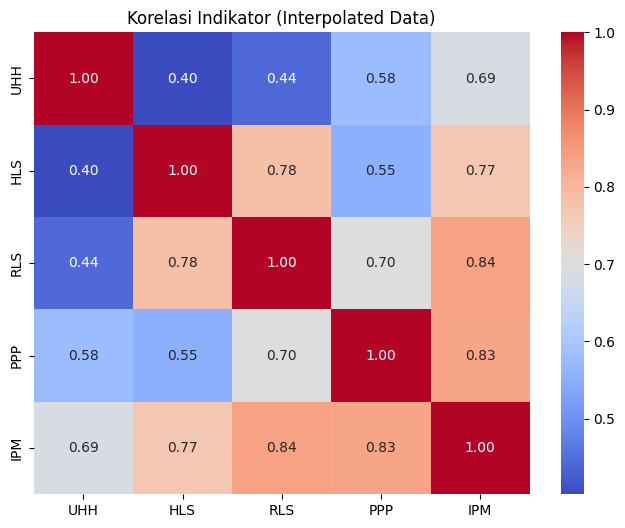

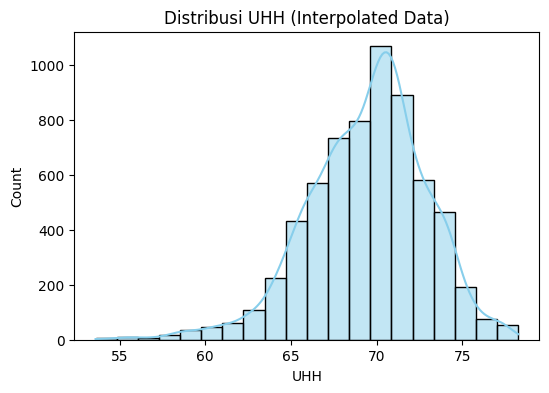

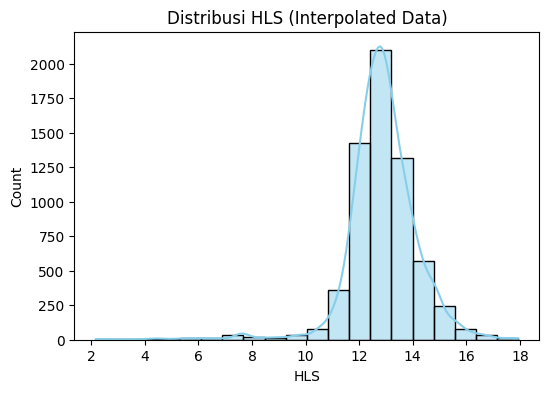

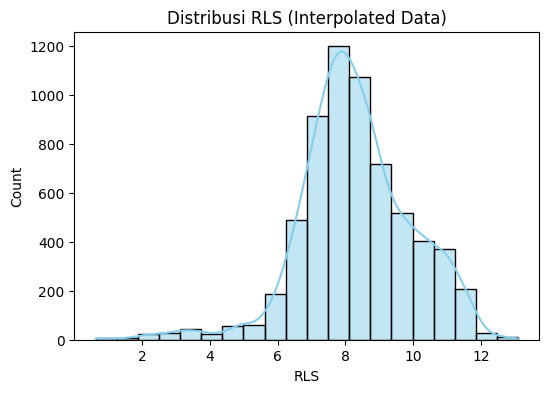

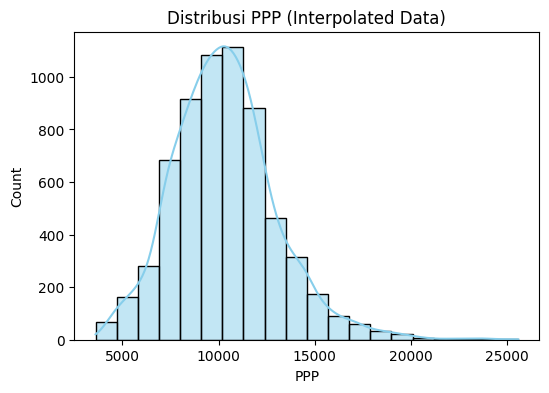

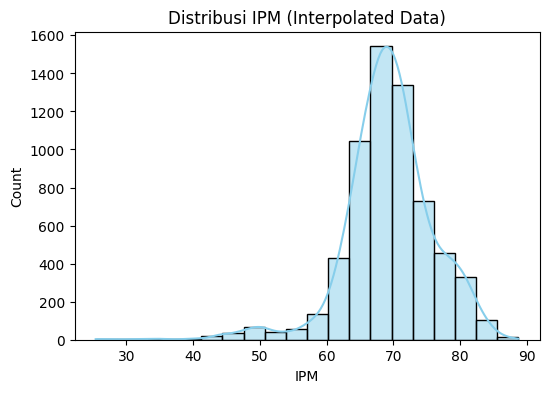


Distribusi Kategori IPM (Label Data):
IPM
sedang           3144
tinggi           2505
sangat tinggi     363
rendah            357
Name: count, dtype: int64


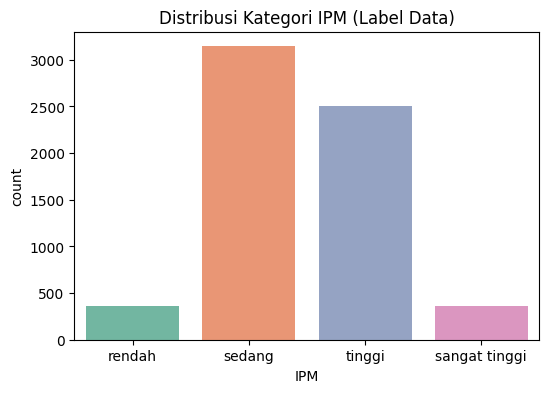

In [6]:
interpolate_folder = r"D:\Pembangunan\Gabungan_interpolate"
label_folder = r"D:\Pembangunan\Gabungan_label"

interpolate_files = sorted(glob.glob(os.path.join(interpolate_folder, "*.csv")))
label_files = sorted(glob.glob(os.path.join(label_folder, "*.csv")))

# EDA untuk folder interpolate (numeric IPM)
dfs_interpolate = [pd.read_csv(f, encoding='utf-8') for f in interpolate_files]
df_interp_all = pd.concat(dfs_interpolate, ignore_index=True)
numeric_cols = ["UHH", "HLS", "RLS", "PPP", "IPM"]
df_numeric = df_interp_all[numeric_cols]

# Statistik deskriptif
print("Deskriptif Interpolated Data:")
print(df_numeric.describe())

# Korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Indikator (Interpolated Data)")
plt.show()

# Distribusi tiap kolom
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_numeric[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribusi {col} (Interpolated Data)")
    plt.show()

# EDA untuk folder label (IPM kategori)
dfs_label = [pd.read_csv(f, encoding='utf-8') for f in label_files]
df_label_all = pd.concat(dfs_label, ignore_index=True)

# Tampilkan proporsi IPM kategori
ipm_counts = df_label_all['IPM'].value_counts()
print("\nDistribusi Kategori IPM (Label Data):")
print(ipm_counts)

# Plot distribusi kategori IPM
plt.figure(figsize=(6,4))
sns.countplot(x='IPM', data=df_label_all, order=["rendah", "sedang", "tinggi", "sangat tinggi"], palette="Set2")
plt.title("Distribusi Kategori IPM (Label Data)")
plt.show()

In [8]:
data_folder = r"D:\Pembangunan\Gabungan_label_numeric"
train_years = list(range(2014, 2023))
test_years = [2023, 2024]

print(train_years)

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [9]:
feature_cols = ['UHH', 'HLS', 'RLS', 'PPP']
target_col = 'IPM'

In [10]:
def get_files(years, folder):
    files = []
    for y in years:
        path = os.path.join(folder, f"{y}_numeric.csv")
        if os.path.exists(path):
            files.append(path)
        else:
            print(f"Warning: File {y}_numeric.csv tidak ditemukan!")
    return sorted(files)

In [11]:
train_files = get_files(train_years, data_folder)
test_files  = get_files(test_years, data_folder)

df_train = pd.concat([pd.read_csv(f, encoding='utf-8') for f in train_files], ignore_index=True)
df_test  = pd.concat([pd.read_csv(f, encoding='utf-8') for f in test_files], ignore_index=True)


In [12]:
X_train = df_train[feature_cols]
y_train = df_train[target_col]

X_test = df_test[feature_cols]
y_test = df_test[target_col]

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [14]:
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train distribusi:\n", y_train.value_counts())
print("y_test distribusi:\n", y_test.value_counts())

X_train shape: (5211, 4)
X_test shape: (1158, 4)
y_train distribusi:
 IPM
2    2764
3    1895
1     301
4     251
Name: count, dtype: int64
y_test distribusi:
 IPM
3    610
2    380
4    112
1     56
Name: count, dtype: int64


In [15]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [16]:
classes = np.unique(y_train_res)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_res)
class_weights_dict = dict(zip(classes, weights))
print("Class weights:", class_weights_dict)

Class weights: {np.int64(1): np.float64(1.0), np.int64(2): np.float64(1.0), np.int64(3): np.float64(1.0), np.int64(4): np.float64(1.0)}


In [ ]:
print("y_train_res distribusi (setelah SMOTE):")
print(pd.Series(y_train_res).value_counts())
print("\nPersentase per kelas:")
print(pd.Series(y_train_res).value_counts(normalize=True) * 100)

y_train_res distribusi (setelah SMOTE):
IPM
2    2764
3    2764
4    2764
1    2764
Name: count, dtype: int64

Persentase per kelas:
IPM
2    25.0
3    25.0
4    25.0
1    25.0
Name: proportion, dtype: float64


In [18]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight=class_weights_dict),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight=class_weights_dict),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf', decision_function_shape='ovr', probability=True, class_weight=class_weights_dict),
    "MLP (ANN)": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=500, solver='lbfgs', class_weight=class_weights_dict, random_state=42)
}

In [19]:
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_res, y_train_res)
    
    y_pred = model.predict(X_test_scaled)
    
    try:
        y_proba = model.predict_proba(X_test_scaled)
        ll = log_loss(y_test, y_proba)
    except AttributeError:
        ll = None
        print(f"Warning: {name} tidak mendukung predict_proba, log_loss tidak dihitung.")
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy: {acc:.4f}, Weighted F1-score: {f1:.4f}, Log-loss: {ll}")
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))
    
    results.append({"Model": name, "Accuracy": acc, "Weighted F1": f1, "Log-loss": ll})


Training Decision Tree...


Accuracy: 0.9111, Weighted F1-score: 0.9105, Log-loss: 3.2059553532634433
Classification Report:
               precision    recall  f1-score   support

           1      0.891     0.732     0.804        56
           2      0.912     0.897     0.905       380
           3      0.910     0.931     0.921       610
           4      0.921     0.938     0.929       112

    accuracy                          0.911      1158
   macro avg      0.909     0.875     0.890      1158
weighted avg      0.911     0.911     0.911      1158


Training Random Forest...
Accuracy: 0.9335, Weighted F1-score: 0.9325, Log-loss: 0.2592832390608205
Classification Report:
               precision    recall  f1-score   support

           1      0.927     0.679     0.784        56
           2      0.919     0.953     0.935       380
           3      0.944     0.941     0.943       610
           4      0.930     0.955     0.943       112

    accuracy                          0.934      1158
   macro avg    

In [20]:
results_df = pd.DataFrame(results)
print("\n=== Ringkasan Performa Semua Model ===")
print(results_df)


=== Ringkasan Performa Semua Model ===
                 Model  Accuracy  Weighted F1  Log-loss
0        Decision Tree  0.911054     0.910501  3.205955
1        Random Forest  0.933506     0.932519  0.259283
2    Gradient Boosting  0.943869     0.942804  0.208718
3             AdaBoost  0.815199     0.794440  1.340290
4                  SVM  0.963731     0.962741  0.201838
5            MLP (ANN)  0.982729     0.982749  0.081766
6  Logistic Regression  0.941278     0.940399  0.443743



=== Confusion Matrix: Decision Tree ===
[[ 41   3  12   0]
 [  1 341  37   1]
 [  4  30 568   8]
 [  0   0   7 105]]


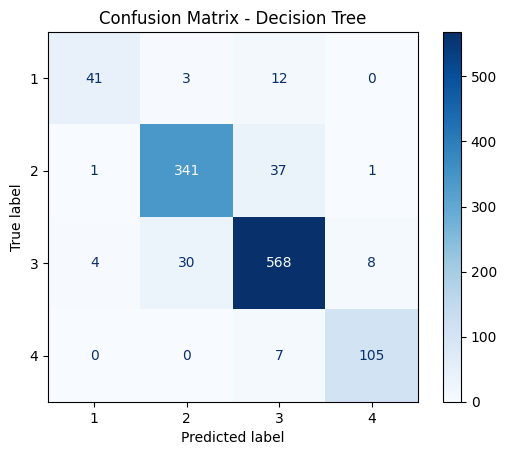


=== Confusion Matrix: Random Forest ===
[[ 38   4  14   0]
 [  1 362  15   2]
 [  2  28 574   6]
 [  0   0   5 107]]


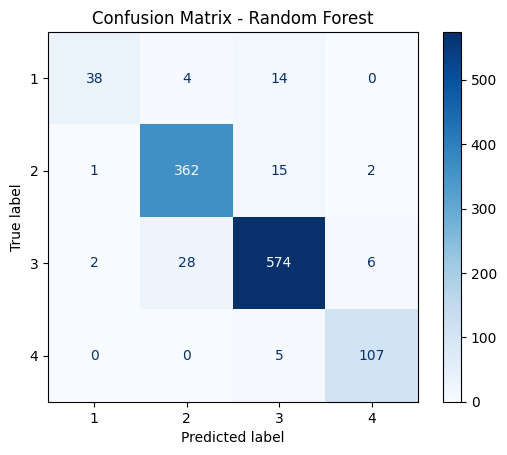


=== Confusion Matrix: Gradient Boosting ===
[[ 38   2  16   0]
 [  0 364  14   2]
 [  3  16 584   7]
 [  0   0   5 107]]


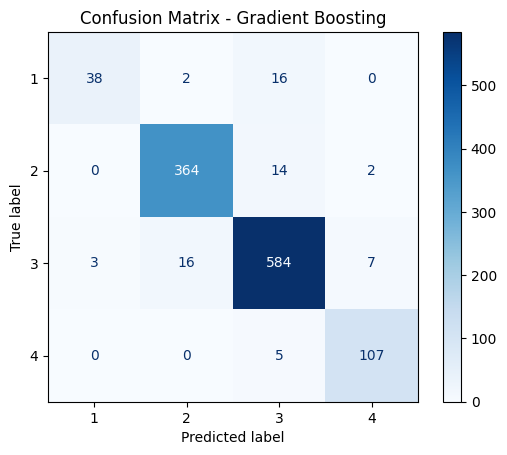


=== Confusion Matrix: AdaBoost ===
[[  0  40  16   0]
 [  0 290  89   1]
 [  0  53 550   7]
 [  0   0   8 104]]


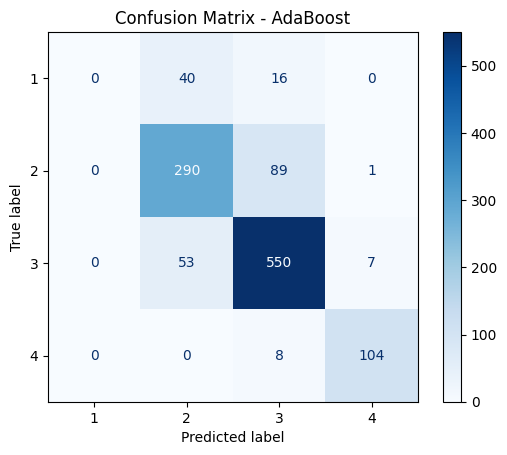


=== Confusion Matrix: SVM ===
[[ 39   1  15   1]
 [  1 364  12   3]
 [  0   2 601   7]
 [  0   0   0 112]]


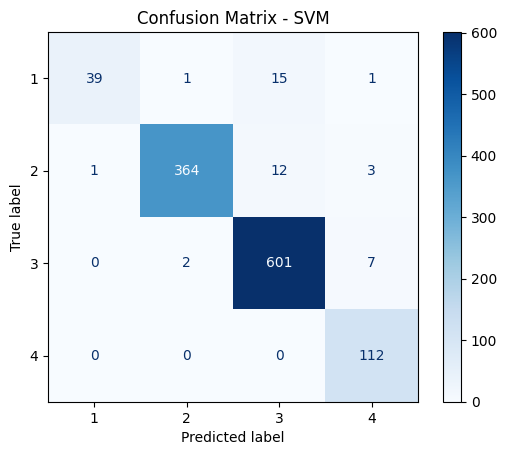


=== Confusion Matrix: MLP (ANN) ===
[[ 53   1   2   0]
 [  1 371   6   2]
 [  3   3 602   2]
 [  0   0   0 112]]


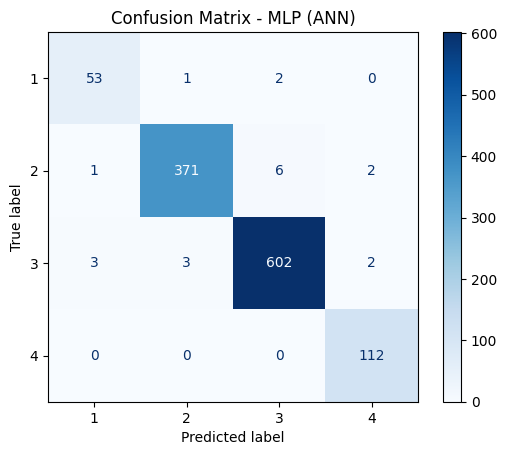


=== Confusion Matrix: Logistic Regression ===
[[ 39   1  16   0]
 [  5 362  10   3]
 [  0  27 577   6]
 [  0   0   0 112]]


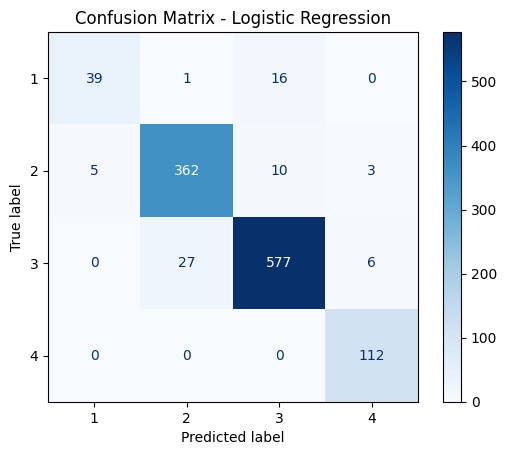

In [21]:
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred, labels=[1,2,3,4])
    
    print(f"\n=== Confusion Matrix: {name} ===")
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3,4])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [22]:
summary_results = []

classes = [1,2,3,4]

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    total_correct = np.sum(y_pred == y_test)
    total_incorrect = np.sum(y_pred != y_test)
    
    correct_per_class = []
    incorrect_per_class = []
    for c in classes:
        correct_c = np.sum((y_test==c) & (y_pred==c))
        incorrect_c = np.sum((y_test==c) & (y_pred!=c))
        correct_per_class.append(correct_c)
        incorrect_per_class.append(incorrect_c)
    
    summary_results.append({
        "Model": name,
        "Total Benar": total_correct,
        "Total Salah": total_incorrect,
        "Persentase Benar": round(total_correct / (total_correct + total_incorrect) * 100,2),
        "Persentase Salah": round(total_incorrect / (total_correct + total_incorrect) * 100,2),
        "Benar per Kelas": correct_per_class,
        "Salah per Kelas": incorrect_per_class
    })

summary_df = pd.DataFrame(summary_results)
pd.set_option('display.max_columns', None)
print(summary_df)

                 Model  Total Benar  Total Salah  Persentase Benar  \
0        Decision Tree         1055          103             91.11   
1        Random Forest         1081           77             93.35   
2    Gradient Boosting         1093           65             94.39   
3             AdaBoost          944          214             81.52   
4                  SVM         1116           42             96.37   
5            MLP (ANN)         1138           20             98.27   
6  Logistic Regression         1090           68             94.13   

   Persentase Salah      Benar per Kelas  Salah per Kelas  
0              8.89  [41, 341, 568, 105]  [15, 39, 42, 7]  
1              6.65  [38, 362, 574, 107]  [18, 18, 36, 5]  
2              5.61  [38, 364, 584, 107]  [18, 16, 26, 5]  
3             18.48   [0, 290, 550, 104]  [56, 90, 60, 8]  
4              3.63  [39, 364, 601, 112]   [17, 16, 9, 0]  
5              1.73  [53, 371, 602, 112]     [3, 9, 8, 0]  
6              5.87

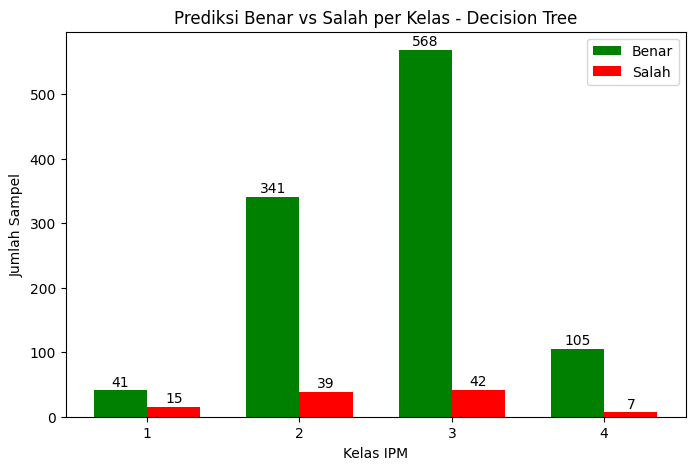

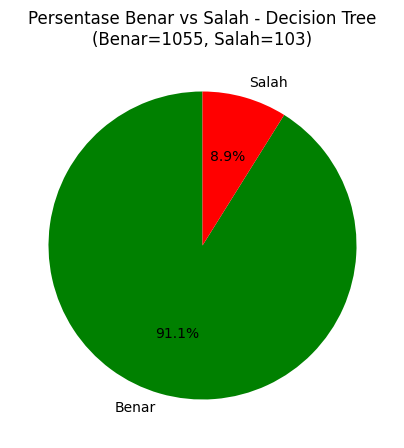

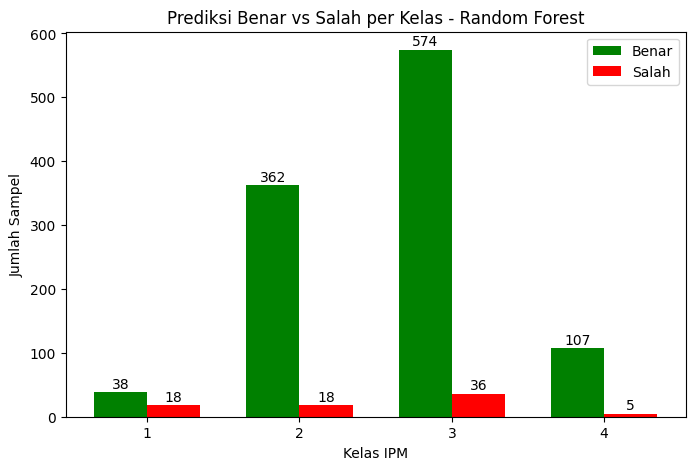

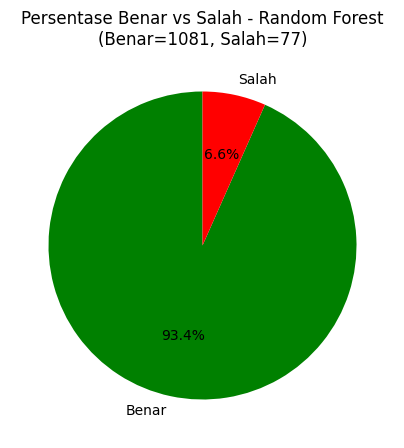

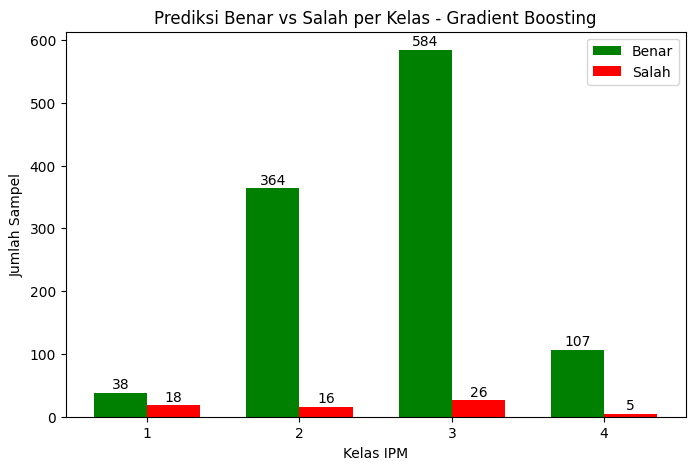

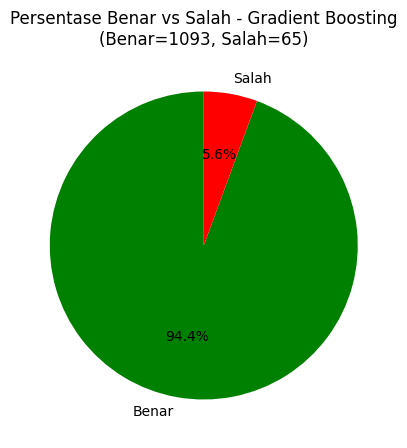

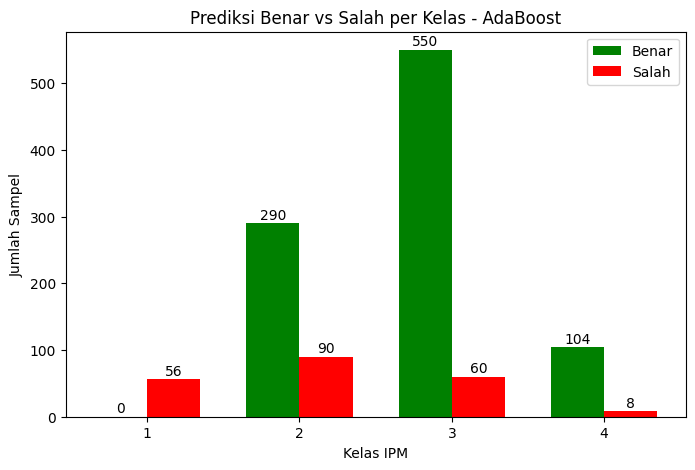

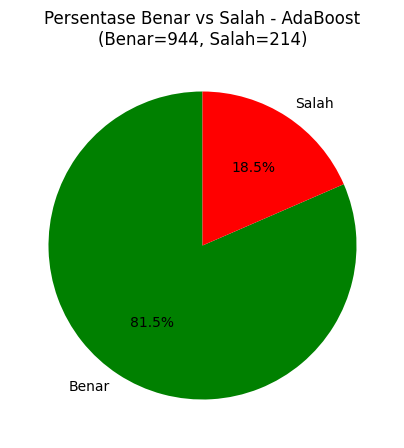

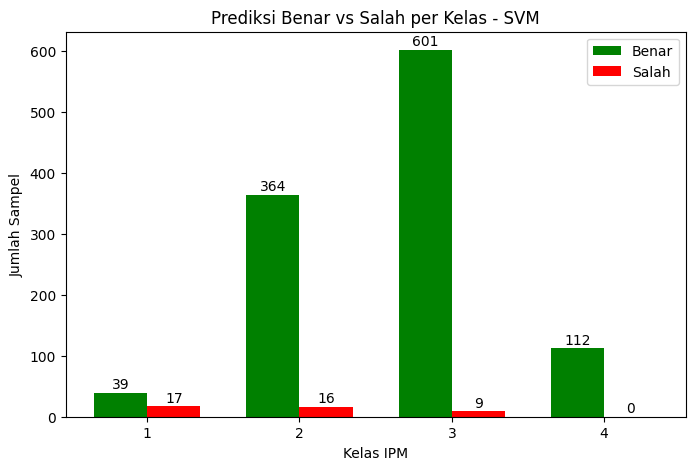

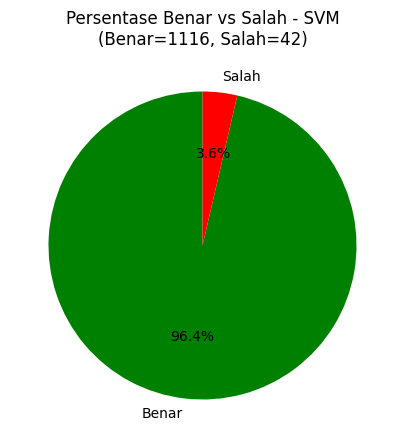

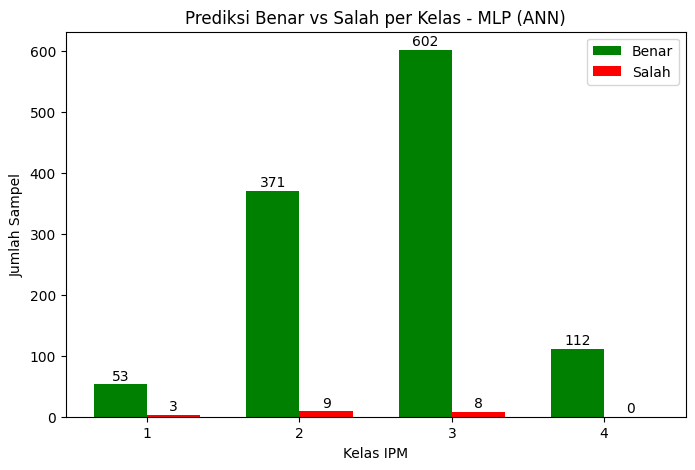

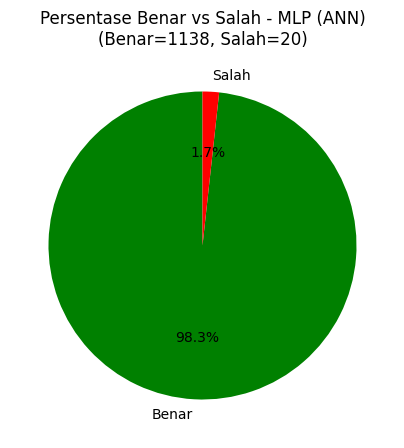

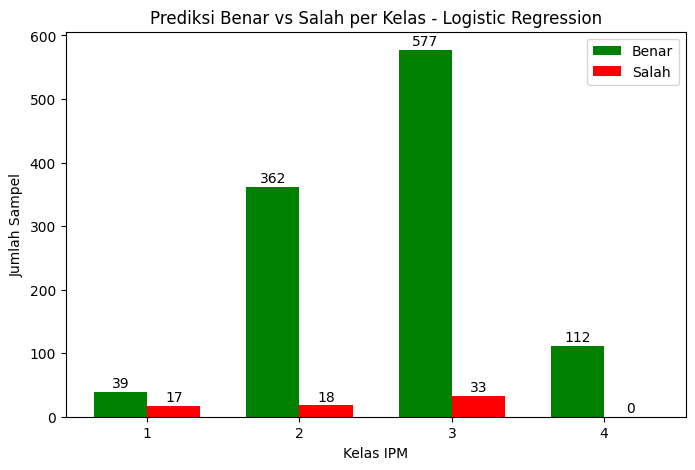

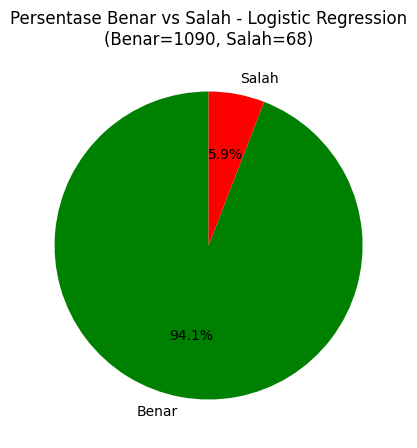

In [23]:
classes = [1,2,3,4]

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    
    correct_per_class = []
    incorrect_per_class = []
    for c in classes:
        correct = np.sum((y_test==c) & (y_pred==c))
        incorrect = np.sum((y_test==c) & (y_pred!=c))
        correct_per_class.append(correct)
        incorrect_per_class.append(incorrect)

    x = np.arange(len(classes))
    width = 0.35
    
    # Bar chart
    plt.figure(figsize=(8,5))
    bars_correct = plt.bar(x - width/2, correct_per_class, width, label='Benar', color='green')
    bars_incorrect = plt.bar(x + width/2, incorrect_per_class, width, label='Salah', color='red')
    
    for bar in bars_correct:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, str(bar.get_height()), ha='center', va='bottom', fontsize=10)
    for bar in bars_incorrect:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, str(bar.get_height()), ha='center', va='bottom', fontsize=10)
    
    plt.xticks(x, classes)
    plt.xlabel("Kelas IPM")
    plt.ylabel("Jumlah Sampel")
    plt.title(f"Prediksi Benar vs Salah per Kelas - {name}")
    plt.legend()
    plt.show()
    
    # Pie chart
    total_correct = sum(correct_per_class)
    total_incorrect = sum(incorrect_per_class)
    
    plt.figure(figsize=(5,5))
    plt.pie([total_correct, total_incorrect], labels=['Benar','Salah'],
            autopct='%1.1f%%', colors=['green','red'], startangle=90)
    plt.title(f"Persentase Benar vs Salah - {name}\n(Benar={total_correct}, Salah={total_incorrect})")
    plt.show()
